In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import datasets 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error  #  'neg_mean_squared_error'
from sklearn.metrics import r2_score

In [135]:
# load the boston data, sklearn.utils.Buncn type 
data = datasets.load_boston()
print (data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [136]:
# use df.data access data 
colnames = list(data.feature_names)
len(colnames)

13

In [137]:
price = pd.DataFrame(data.target)
print (type(price))
price.shape 

<class 'pandas.core.frame.DataFrame'>


(506, 1)

In [145]:
x = pd.DataFrame(data.data)
# rename colnames
x.columns = colnames 
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


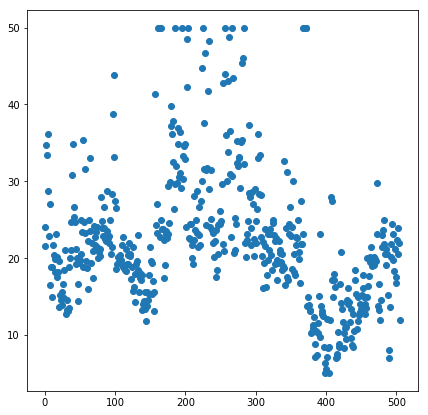

In [150]:
fig = plt.figure(figsize = (7, 7))

plt.scatter(list(x.index), price)
plt.show()

In [152]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, price, test_size = 0.2, random_state = 0)

In [154]:
# meaning of random state in RF here 
regr = RandomForestRegressor(random_state = 0)
regr.fit(x_train, y_train)

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [155]:
# coefficient of determination R^2 of the prediction
regr.score(x_test, y_test)

0.72343677437330189

In [157]:
# help(regr.score)

### Self defined tuning with self defined MSE criteria

In [ ]:
import math

# x is data frame here y is a np array 
def MSE(x, y, model):
    predicts = model.predict(x)
    sse =[]
    for i in range(len(x)):
        sse.append((y.iloc[i] - predicts[i]) ** 2
    
    return sum(sse)/len(sse)

In [ ]:
def search_alpha(alphas):
    
    raw_mse = {}

    for j in alphas:

        MSE_list = []
        for i in range(5):
        # need to iterate through each fold of the splited data and train, test, calculate the averaged MSE            
            x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0 )
            lasso = linear_model.Lasso(alpha = j)
            lasso.fit(x_train, y_train)
            MSE_list.append(MSE(x_test, y_test, lasso))

            raw_mse[j] = MSE_list   

    return raw_mse

In [ ]:
alphas = list(np.arange(0.01, 1, 0.01) )
raw = search_alpha(alphas)

In [ ]:
mse = []
for i in raw.keys():
    mse.append(sum(raw[i])/len(raw[i]))
In [107]:
print (min(mse))

In [ ]:
# index starts from zero
mse.index(min(mse))

In [ ]:
list(raw.keys())[mse.index(min(mse))]


In [ ]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(alphas, mse, marker = '*')
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

### CV in estimating testing error 

In [177]:
# it wants np array as y 
# CV in estimating testing error 

k = x.shape[0]
scores = cross_val_score(regr, x, np.ravel(price), cv = k, scoring = 'neg_mean_squared_error')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
# print (scores)
print (sum(scores)/k)
cv_regr = (sum(scores)/k)


-11.4185881423


In [173]:
# help(cross_val_score)

### metrics.mean_squared_error    gives the same result as self defined MSE

In [170]:
# build in mean_squared_error metrics on training and testing data 
eval_train = metrics.mean_squared_error(y_train, regr.predict(x_train))
print (eval_train)
# testing data 
eval_test = metrics.mean_squared_error(y_test, regr.predict(x_test))
print (eval_test)

2.04637747525
22.5201117647


In [180]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y.iloc[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [183]:
# self define MSE on training and testing data 

print ('MSE from training data is {}'. format(MSE(x_train, y_train, regr)))
print ('MSE from training data is {}'. format(MSE(x_test, y_test, regr)))

MSE from training data is 0    2.046377
dtype: float64
MSE from training data is 0    22.520112
dtype: float64


In [189]:
MSE(x_train, y_train, regr)[0]

2.0463774752475237

### Build in tuning method

In [ ]:
# prepare a range of alpha values to test
param_grid = {
#               "alpha":[0, 1, 0.1]
                "alpha": np.arange(0, 1, 0.01)
             }

# create and fit a lasso regression model, testing each alpha
lasso = Lasso()
# This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function
# or scoring must be passed.

#### would still want to use mean squared error instead of r^2
grid = GridSearchCV(estimator = lasso, scoring = 'r2', param_grid = param_grid )
grid.fit(dataset.data, dataset.target)
print(grid)


# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [51]:
# scoring against the alpha values 
import matplotlib.pyplot as plt
%matplotlib inline

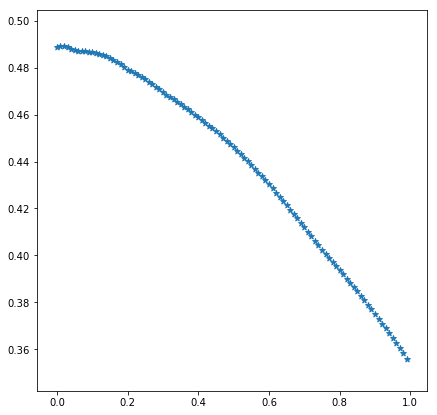

In [162]:
fig = plt.figure(figsize = (7, 7))

scores = grid.cv_results_['mean_test_score']
alphas = np.arange(0, 1, 0.01)
plt.scatter(alphas, scores, marker = '*')

plt.show()